# Etapa 1:
### 1: El enfoque analítico del proyecto es entrenar un modelo para predecir si un cliente va a retirarse de la compañía basado en sus comportamientos. La tarea es una clasificación y es un aprendizaje supervisado. Para el modelo vamos a usar los árboles de decisión.

### 2:

Los datos suministrados corresponden a 1000 registros de clientes, los cuales tienen 15 variables cada uno, estas variables las podemos separar en demografía (Ciudad, Antiguedad y Estado), servicios (PlanInternacional y BuzonDeVoz) y las estadísticas, que son el resto de variables que corresponden al promedio de uso que le dan las personas a los servicios.

En cuanto a calidad, los datos tienen una completitud casi total, cosa que los datos que están incompletos, es decir PlanInternacional y Estado tienen un 3.6% y 1.1% de datos vacios respectivamente y estos datos pueden ser completados muy fácilmente, en la medida que son categoricos de si/no (Activo o retirado en el caso del estado) y se asume que si no están, es porque son falsos (retirado, en el caso del estado). A su vez, tienen solo 6 registros repetidos, los cuales se pueden ignorar (no modificarlos), son consistentes y tienen validez.

Gracias a la buena calidad de los datos, la única transformación que se tuvo que hacer fue el One-Hot encoder para las variables categorías, es decir PlanInternacional, BuzonDeVoz y Estado, esto para que fueran numericas, porque los árboles de decisión solo reciben este tipo de variables. Se puede haber hecho una combinación de los promedios para dejar uno solo, pero no lo consideré necesario para el problema, debido a que así el árbol de decisión le da más información al cliente de los patrones que hacen que sus clientes tomen o no la decisión de retirarse.

### 3:
De los dos modelos que se propusieron, a la hora de usar GritSearch para buscar los hiperparametros, se mejoró un poco el modelo, 0.03 la f1 de 1 (predecir los retirados), lo que deja la f1 en un 75% que es relativamente alto (mucho mejor que tirar una moneda al aire), sin embargo, el modelo es mucho mejor a la hora de predecir los que se van a quedar, con un 96% de f1, lo que es esperable, porque en los 1000 registros proporcionados, solo 150 correspondían a usuarios retirados, por lo que el modelo no es tan efectivo para entrenarse en aquellos que se van y muy bueno para los que se quedan. El modelo no debería ser usado aún, porque tiene mucha capacidad de mejorar, en particular si se entrena con más registros donde se evidencie la variable que queremos predecir. Este modelo es sumamente útil para los intereses del cliente, porque pueden ver qué comportamientos son los que llevan a sus clientes a tomar la decisión de retirarse de forma muy práctica y simple, solo tienen que ver el árbol y explorar sus nodos, para que eventualmente cuando el modelo esté perfeccionado, estos puedan detectar si un cliente está teniendo comportamientos usuales de retiro y tomar acción para evitar que se vaya.

## Carga de Datos:

In [267]:
import pandas as pd

In [268]:
datos= pd.read_csv('./data/TelcoAlpesEtapa1.csv', sep=';', encoding = 'utf-8')

## Entendimiento de los datos

In [269]:
datos.shape

(1000, 15)

In [270]:
datos.dtypes

IdCliente                    int64
Ciudad                      object
Antiguedad                   int64
PlanInternacional           object
BuzonDeVoz                  object
PromMinUsadosDia           float64
PromNumLlamadasDia           int64
PromMinUsadosTarde         float64
PromNumLlamadasTarde         int64
PromMinUsadosNoche         float64
PromNumLlamadasNoche         int64
TotalMinsIntnl             float64
TotalLlamadasIntnl         float64
TotalLlamadasCallCenter      int64
Estado                      object
dtype: object

In [271]:
datos.sample(5)

,IdCliente,Ciudad,Antiguedad,PlanInternacional,BuzonDeVoz,PromMinUsadosDia,PromNumLlamadasDia,PromMinUsadosTarde,PromNumLlamadasTarde,PromMinUsadosNoche,PromNumLlamadasNoche,TotalMinsIntnl,TotalLlamadasIntnl,TotalLlamadasCallCenter,Estado
511,512,AZ,158,No,No,205.2,97,240.6,77,79.7,108,14.4,14.4,0,Vinculado
744,745,MA,102,No,No,143.7,82,170.9,83,310.9,112,9.8,9.8,2,Vinculado
441,442,NY,68,No,No,267.9,80,145.4,143,273.3,119,14.9,14.9,3,Retirado
168,169,NH,74,No,No,154.3,71,262.3,105,235.3,99,13.9,13.9,0,Vinculado
632,633,CT,97,No,No,215.3,58,242.4,91,279.8,105,12.1,12.1,0,Vinculado


In [272]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   IdCliente                1000 non-null   int64  
 1   Ciudad                   1000 non-null   object 
 2   Antiguedad               1000 non-null   int64  
 3   PlanInternacional        964 non-null    object 
 4   BuzonDeVoz               1000 non-null   object 
 5   PromMinUsadosDia         1000 non-null   float64
 6   PromNumLlamadasDia       1000 non-null   int64  
 7   PromMinUsadosTarde       992 non-null    float64
 8   PromNumLlamadasTarde     1000 non-null   int64  
 9   PromMinUsadosNoche       1000 non-null   float64
 10  PromNumLlamadasNoche     1000 non-null   int64  
 11  TotalMinsIntnl           1000 non-null   float64
 12  TotalLlamadasIntnl       1000 non-null   float64
 13  TotalLlamadasCallCenter  1000 non-null   int64  
 14  Estado                   

In [273]:
datos.describe()

,IdCliente,Antiguedad,PromMinUsadosDia,PromNumLlamadasDia,PromMinUsadosTarde,PromNumLlamadasTarde,PromMinUsadosNoche,PromNumLlamadasNoche,TotalMinsIntnl,TotalLlamadasIntnl,TotalLlamadasCallCenter
count,1000.000000,1000.000000,1000.000000,1000.000000,992.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.497000,100.908000,178.748500,100.084000,200.936694,100.636000,201.052000,99.632000,9.990600,9.990600,1.489000
std,288.819349,39.850465,54.303086,20.171659,50.896239,19.088003,49.003558,19.729314,2.968168,2.968168,1.254373
min,1.000000,1.000000,0.000000,0.000000,22.300000,46.000000,50.100000,42.000000,0.000000,0.000000,0.000000
25%,250.750000,73.000000,139.775000,87.000000,167.775000,87.000000,169.650000,86.000000,8.400000,8.400000,1.000000
50%,500.000000,101.000000,180.400000,101.000000,200.200000,101.000000,202.450000,100.000000,10.200000,10.200000,1.000000
75%,750.250000,128.250000,214.800000,113.000000,233.825000,114.000000,232.700000,113.000000,12.100000,12.100000,2.000000
max,1000.000000,225.000000,338.400000,160.000000,359.300000,155.000000,381.600000,170.000000,17.800000,17.800000,7.000000


# Calidad:
* Completitud
* Unicidad
* Consistencia
* Validez

In [274]:
datos.isnull().sum() / datos.shape[0]

IdCliente                  0.000
Ciudad                     0.000
Antiguedad                 0.000
PlanInternacional          0.036
BuzonDeVoz                 0.000
PromMinUsadosDia           0.000
PromNumLlamadasDia         0.000
PromMinUsadosTarde         0.008
PromNumLlamadasTarde       0.000
PromMinUsadosNoche         0.000
PromNumLlamadasNoche       0.000
TotalMinsIntnl             0.000
TotalLlamadasIntnl         0.000
TotalLlamadasCallCenter    0.000
Estado                     0.011
dtype: float64

In [275]:
datos.isna().sum() / datos.shape[0]

IdCliente                  0.000
Ciudad                     0.000
Antiguedad                 0.000
PlanInternacional          0.036
BuzonDeVoz                 0.000
PromMinUsadosDia           0.000
PromNumLlamadasDia         0.000
PromMinUsadosTarde         0.008
PromNumLlamadasTarde       0.000
PromMinUsadosNoche         0.000
PromNumLlamadasNoche       0.000
TotalMinsIntnl             0.000
TotalLlamadasIntnl         0.000
TotalLlamadasCallCenter    0.000
Estado                     0.011
dtype: float64

In [276]:
datos.duplicated(keep = False).sum()

np.int64(6)

In [277]:
for colum in datos.columns:
    print(datos[colum].value_counts())

IdCliente
469    2
499    2
557    2
969    1
21     1
      ..
996    1
997    1
998    1
999    1
4      1
Name: count, Length: 997, dtype: int64
Ciudad
WV    37
MO    31
AL    27
UT    26
WY    26
OR    26
MT    25
KS    25
MN    24
TX    24
NY    24
KY    24
OH    23
VT    23
ND    23
CT    22
NM    22
VA    22
MS    21
CO    20
RI    20
WA    20
ME    19
NE    19
NJ    19
AZ    19
FL    18
TN    18
MD    18
NH    18
DE    18
IL    18
MI    17
NV    17
MA    17
DC    17
NC    17
ID    17
OK    17
IN    17
HI    16
SC    15
WI    15
AK    15
GA    14
PA    14
IA    13
SD    12
AR    11
LA    11
CA     9
Name: count, dtype: int64
Antiguedad
101    15
88     15
100    14
110    14
106    13
       ..
23      1
156     1
196     1
173     1
31      1
Name: count, Length: 181, dtype: int64
PlanInternacional
No    883
Si     81
Name: count, dtype: int64
BuzonDeVoz
No    1000
Name: count, dtype: int64
PromMinUsadosDia
114.4    4
169.4    4
184.5    4
177.2    4
98.2     4
        ..
181.5

# Preparación de datos:

* One-Hot Encoder.
* Bajar el dominio
* Combinar variables

Vamos a ignorar las columnas de: IdCLiente y Ciudad, para hacer el problema menos complejo.

Ademas le vamos a aplicar el One-Hot encoder a las variables de PlanInternacional, BuzonDeVoz y estado

In [278]:
datos["PlanInternacional"]=datos["PlanInternacional"].astype(str)
datos["PlanInternacional"]=datos["PlanInternacional"].apply(lambda x: 1 if x=="Si" else 0)

In [279]:
datos["PlanInternacional"].value_counts()

PlanInternacional
0    919
1     81
Name: count, dtype: int64

In [280]:
datos["BuzonDeVoz"]=datos["BuzonDeVoz"].astype(str)
datos["BuzonDeVoz"]=datos["BuzonDeVoz"].apply(lambda x: 1 if x=="si" else 0)

In [281]:
datos["BuzonDeVoz"].value_counts()

BuzonDeVoz
0    1000
Name: count, dtype: int64

In [282]:
datos["Estado"]=datos["Estado"].astype(str)
datos["Estado"]=datos["Estado"].apply(lambda x: 1 if x=="Retirado" else 0)

In [283]:
datos["Estado"].value_counts()

Estado
0    850
1    150
Name: count, dtype: int64

## Modelo de Arbol de Decision

Y ahora tambien vamos a ignorar la variable de Buzon de voz, debio a que siempre es la misma y no aporta nada al modelo.

In [284]:
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

# Versiones anteriores a 1.2 de sklearn: from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree
import sklearn as sklearn

In [285]:
# Se selecciona la variable objetivo, en este caso "Renuncia".
Y=datos['Estado']
# Del conjunto de datos se elimina la variable "Renuncia".
ignoradas=["IdCliente", "Ciudad", "BuzonDeVoz", "Estado"]
X=datos.drop(ignoradas, axis=1)

In [286]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [287]:
arbol = DecisionTreeClassifier(criterion='entropy', max_depth = 4, random_state = 0)
arbol

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [288]:
arbol = arbol.fit(X_train,Y_train)

In [289]:
y_pred = arbol.predict(X_test)

In [290]:
cm = confusion_matrix(Y_test, y_pred)

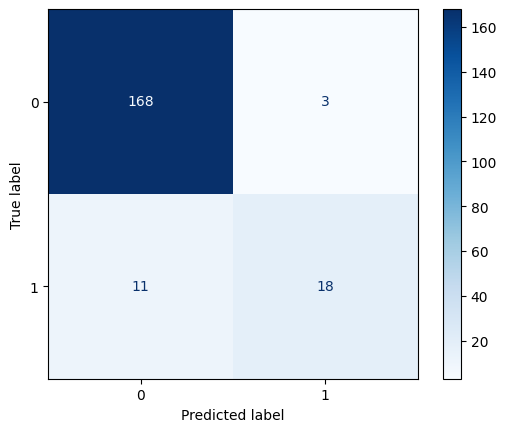

In [291]:
# Se puede visualizar la matriz de confusión
#plot_confusion_matrix(arbol, X_test, Y_test)  
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=arbol.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [292]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.93
Recall: 0.6206896551724138
Precisión: 0.8571428571428571
Puntuación F1: 0.72


In [293]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       171
           1       0.86      0.62      0.72        29

    accuracy                           0.93       200
   macro avg       0.90      0.80      0.84       200
weighted avg       0.93      0.93      0.93       200



In [294]:
# Obtener la importancia de las variables. Para esto podemos utilizar uno de los atributos del modelo "feature_importances_", el
# cual nos devuelve un coeficiente o peso para cada atributo: mientras más grande sea este más importante será la variable
# asociada.
importancia= arbol.feature_importances_
importancia

array([0.        , 0.09862999, 0.5309567 , 0.        , 0.19740027,
       0.02379934, 0.        , 0.        , 0.02810297, 0.        ,
       0.12111073])

In [295]:
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,PromMinUsadosDia,0.530957
1,PromMinUsadosTarde,0.197400
2,TotalLlamadasCallCenter,0.121111
3,PlanInternacional,0.098630
4,TotalMinsIntnl,0.028103
5,PromNumLlamadasTarde,0.023799
6,Antiguedad,0.000000
7,PromMinUsadosNoche,0.000000
8,PromNumLlamadasDia,0.000000
9,PromNumLlamadasNoche,0.000000


Ahora vamos a probar a buscar los parametros con GritSearch para ver si mejora el modelo

In [296]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [297]:
 # Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[4,6,8,10,20]}

In [298]:
 # Definimos el modelo sin ningún valor de estos hiperparámetros
arbol = DecisionTreeClassifier(random_state=0)

In [299]:
 # Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

C:\Users\cesar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20]})

In [300]:
# Podemos ver cuál fue el resultado de la búsqueda (mejores valores de hiperparámetros)
mejor_modelo.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [301]:
 # Obtener el mejor modelo.
arbol_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = arbol_final.predict(X_train)
y_pred_test = arbol_final.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.93
Exactitud sobre test: 0.94


In [302]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       171
           1       0.86      0.66      0.75        29

    accuracy                           0.94       200
   macro avg       0.90      0.82      0.85       200
weighted avg       0.93      0.94      0.93       200



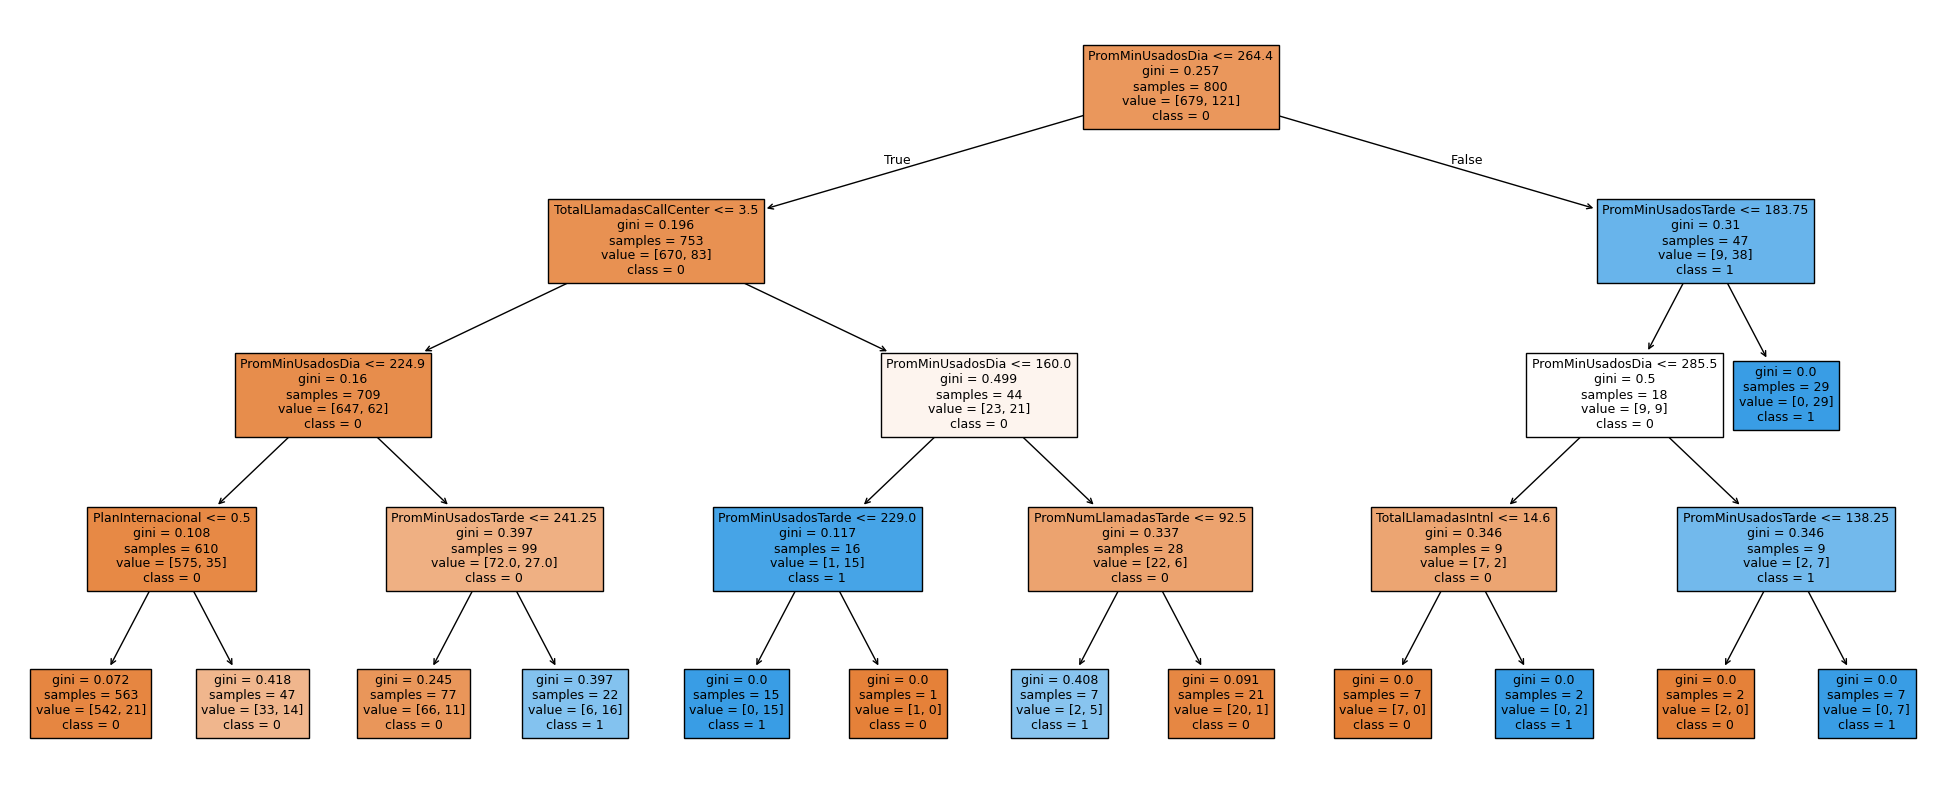

In [303]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(arbol_final, max_depth=arbol_final.get_depth(), feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=9)